# HOMEWORK 1 ADDITIONS
## PART 1: SINGLE DIE

In [33]:
function throwone()
    count = 1
    die = rand(1:6);
    while die != 1
        count += 1;
        die = rand(1:6);
    end
    return count
end

throwone (generic function with 1 method)

In [34]:
function rollsforone(n)
    results = ones(Int64,n);
    for i in 1:n
        results[i] = throwone()
    end
    return results
end

rollsforone (generic function with 1 method)

In [35]:
function distribute(results)
    dist = zeros(Int64,maximum(results));
    for i in results
        dist[i] += 1;
    end
    return dist
end

distribute (generic function with 1 method)

In [36]:
results = rollsforone(10^6);
max = maximum(results);
dist = distribute(results);

In [37]:
average = mean(results);
mostlikely = findmax(dist)[2];
prob = dist/10^6;

In [38]:
println("average number of steps to roll 1: ",average);
println("most likely number of steps to roll 1: ",mostlikely);

average number of steps to roll 1: 5.998477
most likely number of steps to roll 1: 1


In [39]:
using Plots
pyplot()

Plots.PyPlotBackend()


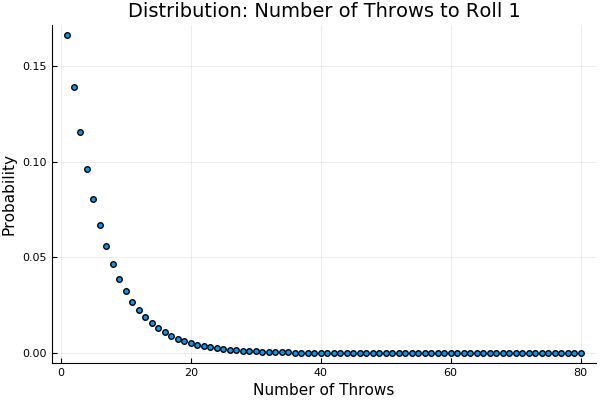

In [40]:
scatter(prob,label="",xlabel="Number of Throws",ylabel="Probability",title="Distribution: Number of Throws to Roll 1")

## PART 2: TENZY

### Functions to Play Tenzy

In [41]:
function rolldice(numdice)
    dice = rand(1:6,numdice);
    return dice
end

rolldice (generic function with 1 method)

In [42]:
function mode(nums)
    dnums = zeros(Int64,6);
    for value in nums
        dnums[value] += 1;
    end
    dmax = maximum(dnums);
    L = minimum(find(dnums->dnums==dmax,dnums));
    numdice = dmax;
    return L, numdice
end

mode (generic function with 1 method)

In [43]:
function tenzy()
    dice = 10;
    game = rolldice(dice);
    throws = 1;
    L = mode(game)[1];
    numL = mode(game)[2];
    dice = Int(dice - numL);
    while dice > 0
        game = rolldice(dice);
        throws += 1;
        for dval in game
            if dval == L
                dice -= 1;
            end
        end
    end
    return throws
end

tenzy (generic function with 1 method)

In [44]:
function play(runs)
    throws = ones(Int64,runs);
    for i in eachindex(throws)
        throws[i] = tenzy();
    end
    return throws
end

play (generic function with 1 method)

### Tenzy: 1000 Games

### CHANGED MOST LIKELY

In [45]:
n = 10000;
@time tenzythrows = play(n);
averaget = mean(tenzythrows);
tenzydist = distribute(tenzythrows);
likelyt = findmax(tenzydist)[2];
tenzyprob = tenzydist / n;
println("average number of steps to end game: ",averaget);
println("most likely number of steps of end game: ",likelyt);

  0.097048 seconds (304.25 k allocations: 24.819 MiB, 6.13% gc time)
average number of steps to end game: 15.4436
most likely number of steps of end game: 12



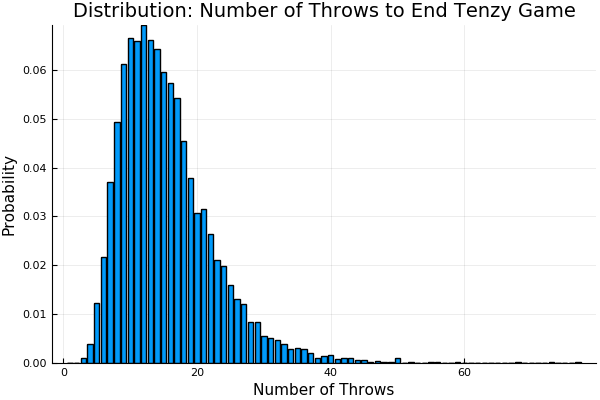

In [46]:
bar(tenzyprob,label="",xlabel="Number of Throws",ylabel="Probability",title="Distribution: Number of Throws to End Tenzy Game")

## Part 3: Optional Questions

### A. Tenzy: Increasing Sample Size

In [47]:
@time play10_2 = play(10^2);
@time play10_3 = play(10^3);
@time play10_4 = play(10^4);
@time play10_5 = play(10^5);
@time play10_6 = play(10^6);

  0.000516 seconds (2.98 k allocations: 252.688 KiB)
  0.004158 seconds (28.99 k allocations: 2.390 MiB)
  0.039050 seconds (293.07 k allocations: 24.177 MiB, 16.47% gc time)
  0.356657 seconds (2.94 M allocations: 242.478 MiB, 12.17% gc time)
  3.234313 seconds (29.38 M allocations: 2.367 GiB, 12.24% gc time)


In [48]:
dist10_2 = distribute(play10_2);
dist10_3 = distribute(play10_3);
dist10_4 = distribute(play10_4);
dist10_5 = distribute(play10_5);
dist10_6 = distribute(play10_6);

In [49]:
prob10_2 = dist10_2 / 10^2;
prob10_3 = dist10_3 / 10^3;
prob10_4 = dist10_4 / 10^4;
prob10_5 = dist10_5 / 10^5;
prob10_6 = dist10_6 / 10^6;


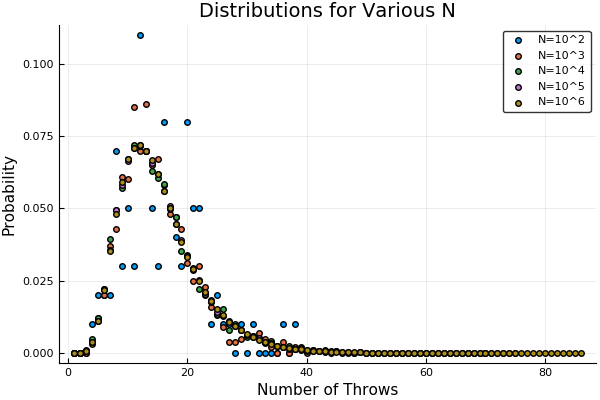

In [50]:
scatter(prob10_2,label="N=10^2",xlabel="Number of Throws",ylabel="Probability",title="Distributions for Various N")
scatter!(prob10_3,label="N=10^3")
scatter!(prob10_4,label="N=10^4")
scatter!(prob10_5,label="N=10^5")
scatter!(prob10_6,label="N=10^6")


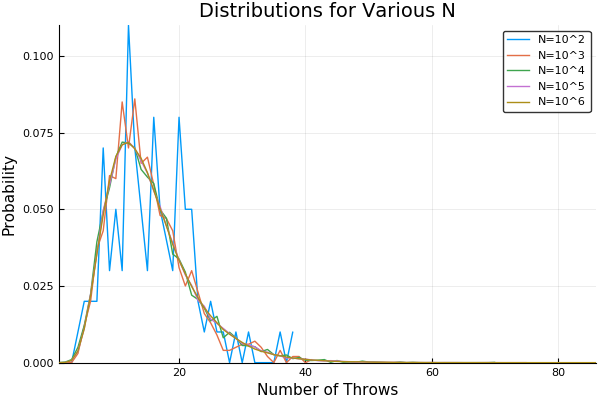

In [51]:
plot(prob10_2,label="N=10^2",xlabel="Number of Throws",ylabel="Probability",title="Distributions for Various N")
plot!(prob10_3,label="N=10^3")
plot!(prob10_4,label="N=10^4")
plot!(prob10_5,label="N=10^5")
plot!(prob10_6,label="N=10^6")

#### Conclusion: increasing sample size gives smoother and more accurate distribution